# PD Model Decision Making

## Change to Project Directory (google colab)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/content/drive/MyDrive/projects/credit-risk-modelling-udemy/notebooks/')
os.listdir('../')

['notebooks',
 'venv-hpx360-win',
 'data',
 'src',
 '.git',
 'requirements.txt',
 'README.md',
 'src.egg-info',
 'setup.py',
 'reports',
 'outputs',
 '.gitignore']

In [3]:
!pip install -e ../.

Obtaining file:///content/drive/My%20Drive/projects/credit-risk-modelling-udemy
  Running setup.py develop for src


## Some imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import src
from src.project.config import PROJECT_DIR
import json

## Load Data

In [4]:
fpaths = {subset: os.path.join(PROJECT_DIR, 'outputs', f'loan_data_2007_2014_{subset}_prepared_for_pd_model_nb3.pkl') for subset in ['train', 'test']}
df_train = pd.read_pickle(fpaths['train'])
df_test = pd.read_pickle(fpaths['test'])

In [5]:
infile = os.path.join(PROJECT_DIR, 'outputs', 'dummy_vars_ref_cats.json')
with open(infile, 'r') as f:
    d = json.load(f)

DUMMY_VARIABLES = d['DUMMY_VARIABLES']
REFERENCE_CATEGORIES = d['REFERENCE_CATEGORIES']

## Load Model

In [6]:
from src.models import LogisticRegressionWithPValues

In [7]:
import pickle

infile = os.path.join(PROJECT_DIR, 'outputs', 'pd_model_logreg.pkl')
with open(infile, 'rb') as f:
    clf = pickle.load(f)
clf

LogisticRegressionWithPValues(C=1.0, class_weight=None, dual=False,
                              fit_intercept=True, intercept_scaling=1,
                              l1_ratio=None, max_iter=100, multi_class='auto',
                              n_jobs=None, penalty='l2', random_state=None,
                              solver='saga', tol=0.0001, verbose=0,
                              warm_start=False)

In [8]:
smry_table = clf.get_summary_table()
smry_table

,feature_name,coefficient,p_value
0,intercept,1.319336,NaN
1,annual_inc:28000-45000,0.067684,3.784238e-03
2,annual_inc:45000-49000,0.151736,1.635146e-07
3,annual_inc:49000-62983,0.205341,1.209586e-17
4,annual_inc:62983-67000,0.254086,2.059925e-15
5,annual_inc:67000-81000,0.339545,1.383467e-39
6,annual_inc:81000-105000,0.439966,2.797638e-61
7,annual_inc:>=105000,0.547955,4.412025e-90
8,dti:11.997-16.796,-0.129152,8.665769e-10
9,dti:16.796-21.595,-0.228966,1.098879e-27


## Creating a Scorecard

In [9]:
df_ref_categories = pd.DataFrame(REFERENCE_CATEGORIES, columns=['feature_name'])
df_ref_categories['coefficient'] = 0
df_ref_categories['p_value'] = np.nan
df_ref_categories

,feature_name,coefficient,p_value
0,grade:G,0,NaN
1,home_ownership:OTHER__NONE__ANY__RENT,0,NaN
2,verification_status:Verified,0,NaN
3,purpose:small_business__educational__moving__h...,0,NaN
4,initial_list_status:f,0,NaN
5,term_int:36,0,NaN
6,emp_length_int:0,0,NaN
7,mths_since_issue_d:<=38,0,NaN
8,int_rate:<=9.548,0,NaN
9,annual_inc:<=28000,0,NaN


In [10]:
df_scorecard = pd.concat([smry_table, df_ref_categories]).reset_index(drop=True)
df_scorecard['feature_name_orig'] = df_scorecard['feature_name'].str.split(':').str[0]
df_scorecard = df_scorecard.set_index('feature_name_orig').reset_index()
df_scorecard['coefficient_abs'] = df_scorecard['coefficient'].abs()
df_scorecard = pd.concat([df_scorecard.iloc[0:1], 
                          df_scorecard.iloc[1:].sort_values(['feature_name_orig', 'coefficient_abs']).reset_index(drop=True)]).reset_index(drop=True).drop(['coefficient_abs'], axis=1)

df_scorecard


,feature_name_orig,feature_name,coefficient,p_value
0,intercept,intercept,1.319336,NaN
1,annual_inc,annual_inc:<=28000,0.000000,NaN
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17
...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN
64,term_int,term_int:60,-0.033412,1.486068e-02
65,verification_status,verification_status:Verified,0.000000,NaN
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01


In [11]:
MIN_SCORE = 300
MAX_SCORE = 850

In [12]:
df_scorecard.groupby('feature_name_orig')['coefficient'].min()

feature_name_orig
annual_inc                0.000000
dti                      -0.319218
emp_length_int            0.000000
grade                     0.000000
home_ownership            0.000000
initial_list_status       0.000000
int_rate                 -0.905944
intercept                 1.319336
mths_since_issue_d       -1.028449
mths_since_last_delinq    0.000000
mths_since_last_record    0.000000
purpose                   0.000000
term_int                 -0.033412
verification_status      -0.014809
Name: coefficient, dtype: float64

* The minimum score corresponds to summing up the minimum coefficients for each feature of the applicant. 
* As we need our PD Model to fall in the scale at the end, this minimum sum must correspond to the MIN_SCORE of our credit scorecard
* Same goes for maximum score, which should correspond to MAX_SCORE

In [13]:
min_sum_coeff = df_scorecard.groupby('feature_name_orig')['coefficient'].min().sum()
min_sum_coeff

-0.9824953100122238

In [14]:
df_scorecard.groupby('feature_name_orig')['coefficient'].max()

feature_name_orig
annual_inc                0.547955
dti                       0.000000
emp_length_int            0.137516
grade                     1.252701
home_ownership            0.111176
initial_list_status       0.051260
int_rate                  0.000000
intercept                 1.319336
mths_since_issue_d        0.000000
mths_since_last_delinq    0.155498
mths_since_last_record    0.589649
purpose                   0.421626
term_int                  0.000000
verification_status       0.084586
Name: coefficient, dtype: float64

In [15]:
max_sum_coeff = df_scorecard.groupby('feature_name_orig')['coefficient'].max().sum()
max_sum_coeff

4.671303873363249

In [16]:
df_scorecard['score_calculation'] = df_scorecard['coefficient']*(MAX_SCORE - MIN_SCORE)/(max_sum_coeff - min_sum_coeff)
df_scorecard

,feature_name_orig,feature_name,coefficient,p_value,score_calculation
0,intercept,intercept,1.319336,NaN,128.344630
1,annual_inc,annual_inc:<=28000,0.000000,NaN,0.000000
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03,6.584299
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07,14.760872
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17,19.975476
...,...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN,0.000000
64,term_int,term_int:60,-0.033412,1.486068e-02,-3.250269
65,verification_status,verification_status:Verified,0.000000,NaN,0.000000
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01,-1.440575


Everything looks great except for the intercept term score_calculation, which is not a dummy variable, hence the scaling needs to be done differently for it

In [17]:
df_scorecard['score_calculation'][0] = ((df_scorecard['coefficient'][0] - min_sum_coeff)/ (max_sum_coeff - min_sum_coeff)) * (MAX_SCORE - MIN_SCORE) + MIN_SCORE
df_scorecard

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,feature_name_orig,feature_name,coefficient,p_value,score_calculation
0,intercept,intercept,1.319336,NaN,523.921498
1,annual_inc,annual_inc:<=28000,0.000000,NaN,0.000000
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03,6.584299
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07,14.760872
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17,19.975476
...,...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN,0.000000
64,term_int,term_int:60,-0.033412,1.486068e-02,-3.250269
65,verification_status,verification_status:Verified,0.000000,NaN,0.000000
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01,-1.440575


In [18]:
df_scorecard.groupby('feature_name_orig')['score_calculation'].agg(['min', 'max']).sum()

min    300.0
max    850.0
dtype: float64

* Perfectly Scaled!
* This shows that in each category, if an applicant is most worthy, then his/her credit score is 850.0 and if least worthy then credit score is 300
* But conventionally, we prefer integer scores for each category, which would definitely affect the scaling range somehow, which we would need to adjust then.

In [19]:
df_scorecard['score_preliminary'] = df_scorecard['score_calculation'].round()
df_scorecard

,feature_name_orig,feature_name,coefficient,p_value,score_calculation,score_preliminary
0,intercept,intercept,1.319336,NaN,523.921498,524.0
1,annual_inc,annual_inc:<=28000,0.000000,NaN,0.000000,0.0
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03,6.584299,7.0
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07,14.760872,15.0
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17,19.975476,20.0
...,...,...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN,0.000000,0.0
64,term_int,term_int:60,-0.033412,1.486068e-02,-3.250269,-3.0
65,verification_status,verification_status:Verified,0.000000,NaN,0.000000,0.0
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01,-1.440575,-1.0


In [20]:
df_scorecard.groupby('feature_name_orig')['score_preliminary'].agg(['min', 'max']).sum()

min    301.0
max    849.0
dtype: float64

* We need to add 1 somewhere and subtract 1 from somewhere

In [21]:
df_scorecard['score_difference'] = df_scorecard['score_preliminary'] - df_scorecard['score_calculation']
df_scorecard

,feature_name_orig,feature_name,coefficient,p_value,score_calculation,score_preliminary,score_difference
0,intercept,intercept,1.319336,NaN,523.921498,524.0,0.078502
1,annual_inc,annual_inc:<=28000,0.000000,NaN,0.000000,0.0,0.000000
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03,6.584299,7.0,0.415701
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07,14.760872,15.0,0.239128
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17,19.975476,20.0,0.024524
...,...,...,...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN,0.000000,0.0,0.000000
64,term_int,term_int:60,-0.033412,1.486068e-02,-3.250269,-3.0,0.250269
65,verification_status,verification_status:Verified,0.000000,NaN,0.000000,0.0,0.000000
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01,-1.440575,-1.0,0.440575


In [22]:
df_scorecard['score_final'] = df_scorecard['score_preliminary']

* Add 1 where, score_difference is maximum


In [23]:
max_indices = df_scorecard.groupby('feature_name_orig').apply(lambda df: df['score_preliminary'].idxmax())
max_indices

feature_name_orig
annual_inc                 8
dti                        9
emp_length_int            20
grade                     27
home_ownership            30
initial_list_status       32
int_rate                  33
intercept                  0
mths_since_issue_d        38
mths_since_last_delinq    50
mths_since_last_record    57
purpose                   62
term_int                  63
verification_status       67
dtype: int64

In [24]:
max_diff_idx = df_scorecard.loc[max_indices.to_numpy(), 'score_difference'].idxmax()
df_scorecard.loc[max_diff_idx, 'score_final'] = df_scorecard.loc[max_diff_idx, 'score_preliminary'] + 1

* Subtract 1 where, score_difference is minimum

In [25]:
min_indices = df_scorecard.groupby('feature_name_orig').apply(lambda df: df['score_preliminary'].idxmin())
min_indices

feature_name_orig
annual_inc                 1
dti                       14
emp_length_int            15
grade                     21
home_ownership            28
initial_list_status       31
int_rate                  37
intercept                  0
mths_since_issue_d        45
mths_since_last_delinq    46
mths_since_last_record    51
purpose                   58
term_int                  64
verification_status       66
dtype: int64

In [26]:
min_diff_idx = df_scorecard.loc[min_indices.to_numpy(), 'score_difference'].idxmin()
df_scorecard.loc[min_diff_idx, 'score_final'] = df_scorecard.loc[min_diff_idx, 'score_preliminary'] - 1

Now let us check the ranges

In [27]:
df_scorecard.groupby('feature_name_orig')['score_final'].agg(['min', 'max']).sum()

min    300.0
max    850.0
dtype: float64

* Perfect! We have managed to adjust the ranges to MIN_SCORE, MAX_SCORE

In [28]:
df_scorecard

,feature_name_orig,feature_name,coefficient,p_value,score_calculation,score_preliminary,score_difference,score_final
0,intercept,intercept,1.319336,NaN,523.921498,524.0,0.078502,524.0
1,annual_inc,annual_inc:<=28000,0.000000,NaN,0.000000,0.0,0.000000,-1.0
2,annual_inc,annual_inc:28000-45000,0.067684,3.784238e-03,6.584299,7.0,0.415701,7.0
3,annual_inc,annual_inc:45000-49000,0.151736,1.635146e-07,14.760872,15.0,0.239128,15.0
4,annual_inc,annual_inc:49000-62983,0.205341,1.209586e-17,19.975476,20.0,0.024524,20.0
...,...,...,...,...,...,...,...,...
63,term_int,term_int:36,0.000000,NaN,0.000000,0.0,0.000000,0.0
64,term_int,term_int:60,-0.033412,1.486068e-02,-3.250269,-3.0,0.250269,-3.0
65,verification_status,verification_status:Verified,0.000000,NaN,0.000000,0.0,0.000000,0.0
66,verification_status,verification_status:Source Verified,-0.014809,2.620121e-01,-1.440575,-1.0,0.440575,-1.0


## Credit Score Calculation

* Restructure for credit score calculation

In [29]:
input_data = df_test.copy().reset_index(drop=True)
input_data['intercept'] = 1
input_data = input_data[df_scorecard['feature_name']]
input_data.head()

,intercept,annual_inc:<=28000,annual_inc:28000-45000,annual_inc:45000-49000,annual_inc:49000-62983,annual_inc:62983-67000,annual_inc:67000-81000,annual_inc:81000-105000,annual_inc:>=105000,dti:<=7.598,dti:7.598-11.997,dti:11.997-16.796,dti:16.796-21.595,dti:21.595-25.994,dti:>=25.994,emp_length_int:0,emp_length_int:7-9,emp_length_int:5-6,emp_length_int:1,emp_length_int:2-4,emp_length_int:10,grade:G,grade:F,grade:E,grade:D,grade:C,grade:B,grade:A,home_ownership:OTHER__NONE__ANY__RENT,home_ownership:OWN,home_ownership:MORTGAGE,initial_list_status:f,initial_list_status:w,int_rate:<=9.548,int_rate:9.548-12.025,int_rate:12.025-15.327,int_rate:15.327-19.868,int_rate:>=19.868,mths_since_issue_d:<=38,mths_since_issue_d:38-40,mths_since_issue_d:40-42,mths_since_issue_d:42-49,mths_since_issue_d:49-53,mths_since_issue_d:53-65,mths_since_issue_d:>=85,mths_since_issue_d:65-85,mths_since_last_delinq:0-4,mths_since_last_delinq:missing,mths_since_last_delinq:4-31,mths_since_last_delinq:>=57,mths_since_last_delinq:31-57,mths_since_last_record:0-2,mths_since_last_record:81-87,mths_since_last_record:>=87,mths_since_last_record:missing,mths_since_last_record:21-32,mths_since_last_record:2-21,mths_since_last_record:32-81,purpose:small_business__educational__moving__house,purpose:debt_consolidation,purpose:other__renewable_energy__medical__vacation__wedding,purpose:home_improvement__major_purchase__car,purpose:credit_card,term_int:36,term_int:60,verification_status:Verified,verification_status:Source Verified,verification_status:Not Verified
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0
2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0


* Feature score weights

In [30]:
feature_score_weights = df_scorecard[['score_final']].to_numpy()

* Now simply multiply the dummy variables with the corresponding feature weights (i.e. dot product)

In [31]:
credit_scores = input_data.dot(feature_score_weights).to_numpy().flatten()
credit_scores

array([624., 580., 587., ..., 751., 692., 684.])

## Back Convert Credit Score to Probability of Default

* We need to rescale back the credit scores so that we arrive at the original sum of coefficients (rather than sum of feature weight scores)

In [32]:
sum_coef_from_score = ((credit_scores - MIN_SCORE)/(MAX_SCORE - MIN_SCORE)) * (max_sum_coeff - min_sum_coeff) + min_sum_coeff

In [33]:
pred_prob_from_score = 1/(1 + np.exp(-sum_coef_from_score))
pred_prob_from_score

array([0.9127836 , 0.86941571, 0.8773703 , ..., 0.97475653, 0.95465809,
       0.95096227])

In [34]:
pred_prob = clf.predict_proba(df_test[DUMMY_VARIABLES])[:, 1]
pred_prob

array([0.91194755, 0.86879903, 0.87729289, ..., 0.97430062, 0.95446589,
       0.95070371])

In [35]:
np.allclose(pred_prob_from_score, pred_prob, atol=1e-2)

True

## Setting Cutoffs

In [47]:
from src.project.utils import get_actual_predicted_probs_df

In [54]:
y_test = df_test['good_bad_loan'].to_numpy().astype(int)
y_test_pred_prob = pred_prob

In [55]:
df_actual_predicted_probs = get_actual_predicted_probs_df(y_test, y_test_pred_prob, thresh=0.9)
df_actual_predicted_probs

,true,pred,pred_prob,cumulative_n_pop,cumulative_n_good,cumulative_n_bad,cumulative_perc_pop,cumulative_perc_good,cumulative_perc_bad
0,0,0,0.466116,1,0,1,0.000011,0.000000,0.000096
1,1,0,0.466405,2,1,1,0.000021,0.000012,0.000096
2,0,0,0.471495,3,1,2,0.000032,0.000012,0.000192
3,0,0,0.489040,4,1,3,0.000043,0.000012,0.000288
4,0,0,0.494749,5,1,4,0.000054,0.000012,0.000384
...,...,...,...,...,...,...,...,...,...
93252,1,1,0.988362,93253,82826,10427,0.999957,0.999952,1.000000
93253,1,1,0.988489,93254,82827,10427,0.999968,0.999964,1.000000
93254,1,1,0.988535,93255,82828,10427,0.999979,0.999976,1.000000
93255,1,1,0.988646,93256,82829,10427,0.999989,0.999988,1.000000


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

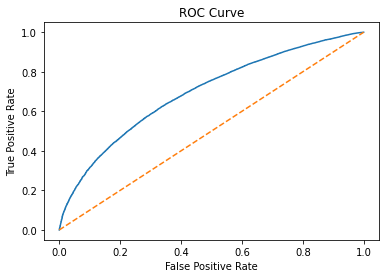

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob) 
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve');

In [65]:
df_cutoffs = pd.DataFrame(dict(zip(['threshold', 'fpr', 'tpr'], [thresholds, fpr, tpr])))
df_cutoffs

,threshold,fpr,tpr
0,1.989097,0.000000,0.000000
1,0.989097,0.000000,0.000012
2,0.987914,0.000000,0.000181
3,0.987890,0.000096,0.000193
4,0.987257,0.000096,0.000338
...,...,...,...
25045,0.521586,0.999616,0.999928
25046,0.499672,0.999616,0.999988
25047,0.471495,0.999904,0.999988
25048,0.466405,0.999904,1.000000


In [66]:
df_cutoffs['threshold'][0] =  1 - 1/np.power(10, 16)


The score corresponsing to each threshold equals:

The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
the minimum sum of coefficients
multiplied by
the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [68]:
df_cutoffs['score'] = ((np.log(df_cutoffs['threshold'] / (1 - df_cutoffs['threshold'])) - min_sum_coeff) * ((MAX_SCORE - MIN_SCORE) / (max_sum_coeff - min_sum_coeff)) + MIN_SCORE).round()


In [69]:
df_cutoffs.head()

,threshold,fpr,tpr,score
0,1.000000,0.000000,0.000000,3969.0
1,0.989097,0.000000,0.000012,834.0
2,0.987914,0.000000,0.000181,824.0
3,0.987890,0.000096,0.000193,824.0
4,0.987257,0.000096,0.000338,819.0


In [71]:
df_cutoffs.loc[0, 'score'] = MAX_SCORE

In [72]:
df_cutoffs

,threshold,fpr,tpr,score
0,1.000000,0.000000,0.000000,850.0
1,0.989097,0.000000,0.000012,834.0
2,0.987914,0.000000,0.000181,824.0
3,0.987890,0.000096,0.000193,824.0
4,0.987257,0.000096,0.000338,819.0
...,...,...,...,...
25045,0.521586,0.999616,0.999928,404.0
25046,0.499672,0.999616,0.999988,395.0
25047,0.471495,0.999904,0.999988,384.0
25048,0.466405,0.999904,1.000000,382.0


In [78]:
df_cutoffs['n_approved'] = df_cutoffs['threshold'].apply(lambda thresh: (df_actual_predicted_probs['pred_prob'] > thresh).sum())
df_cutoffs['n_rejected'] = df_actual_predicted_probs.shape[0] - df_cutoffs['n_approved']
df_cutoffs['approval_rate'] = df_cutoffs['n_approved']/df_actual_predicted_probs.shape[0]
df_cutoffs['rejection_rate'] = 1 - df_cutoffs['approval_rate']

In [79]:
df_cutoffs

,threshold,fpr,tpr,score,n_approved,n_rejected,approval_rate,rejection_rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.989097,0.000000,0.000012,834.0,0,93257,0.000000,1.000000
2,0.987914,0.000000,0.000181,824.0,14,93243,0.000150,0.999850
3,0.987890,0.000096,0.000193,824.0,15,93242,0.000161,0.999839
4,0.987257,0.000096,0.000338,819.0,28,93229,0.000300,0.999700
...,...,...,...,...,...,...,...,...
25045,0.521586,0.999616,0.999928,404.0,93246,11,0.999882,0.000118
25046,0.499672,0.999616,0.999988,395.0,93251,6,0.999936,0.000064
25047,0.471495,0.999904,0.999988,384.0,93254,3,0.999968,0.000032
25048,0.466405,0.999904,1.000000,382.0,93255,2,0.999979,0.000021


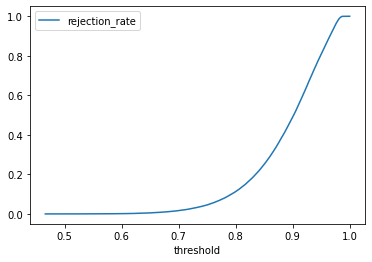

In [80]:
df_cutoffs.plot(x='threshold', y='rejection_rate')

Cutoff point is decided based on two factors:

* Higher the threshold, higher the quality of the borrowers, so we get low chance of default, low risk
* But at the same time we approve very less borrowers, selecting only highest quality borrowers, which is not good for bank's business as their main portfolio is loans

## Save outputs

In [76]:
out_file = os.path.join(PROJECT_DIR, 'outputs', 'scorecard.csv')
df_scorecard.to_csv(out_file, index=False)